<a href="https://colab.research.google.com/github/diosamuel/road-crack-detection/blob/main/GLCM_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Crack Detection GLCM + NN

Deadline : 19 Desember 2025

https://github.com/mdprana/Realtime-Face-Emotion-Recognition-Using-GLCM-and-ANN

# Image Downloader via Roboflow

download image that has been bounded box help by roboflow

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
!rm -r /content/RoadCrack-2

rm: cannot remove '/content/RoadCrack-2': No such file or directory


In [3]:
import os
import json
from roboflow import Roboflow
rf = Roboflow(api_key="4V6T95yomp7w4ccYHkYr")
project = rf.workspace("foreveyrone").project("roadcrack-4xqqm")
version = project.version(3)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadCrack-3 in voc:: 100%|██████████| 679/679 [00:02<00:00, 233.84it/s]


In [4]:
!pip install opencv-python

In [5]:
!pip install pillow

# Cut Image based on bounding box

In [6]:
!mkdir /content/cropped/
!mkdir /content/cropped/retak
!mkdir /content/cropped/tidak-retak

In [7]:
import xml.etree.ElementTree as ET
from PIL import Image
# tree = ET.parse('data.xml')
# root = tree.getroot()

dir = os.listdir("/content/RoadCrack-3/train")
for i in dir:
  if ".xml" in i:
    with open(f"/content/RoadCrack-3/train/{i}") as f:
      content = f.read().strip()
      value = ET.fromstring(content)
      if not value.find(".//bndbox/xmin") is None:
        paths = f"/content/RoadCrack-3/train/{value.find('path').text}"
        xmin = int(value.find(".//bndbox/xmin").text)
        xmax = int(value.find(".//bndbox/xmax").text)
        ymin = int(value.find(".//bndbox/ymin").text)
        ymax = int(value.find(".//bndbox/ymax").text)
        img = Image.open(paths)
        cropped_img = img.crop((xmin, ymin, xmax, ymax)).resize((64*4, 64*4))
        classifier = value.find(".//name").text
        cropped_img.save(f"/content/cropped/{classifier}/cropped_{value.find('path').text}")
        # if cropped_img:
          # cv2.imwrite(f"/content/cropped/cropped_{paths}", cropped_img)


In [8]:
!ls /content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg

ls: cannot access '/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg': No such file or directory


# GLCM Features

Contrast, Dissimilarity, Homogeneity, Energy and Correlation

In [9]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import data, io, feature, util, transform
from matplotlib import pyplot as plt

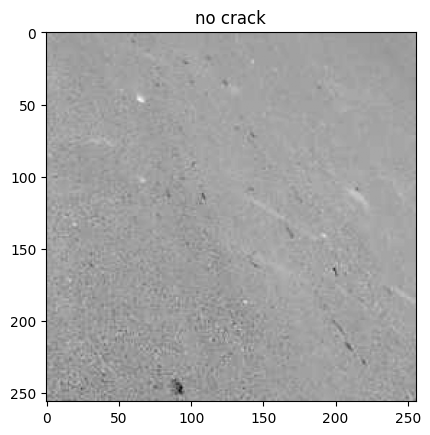

In [10]:
example = "/content/cropped/tidak-retak/cropped_IMG_20251123_160924_3_jpg.rf.bb5b566121c9b45df04b85f27e7ba141.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'no crack')
plt.show()

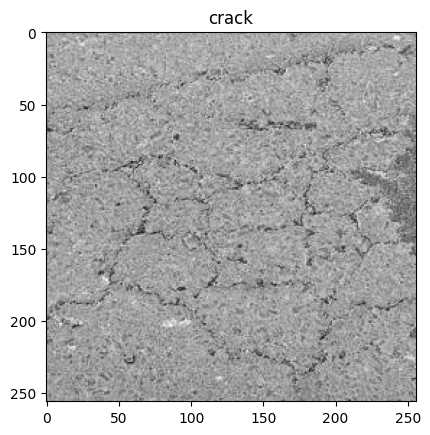

In [11]:
example = "/content/cropped/retak/cropped_IMG_20251106_150643_jpg.rf.c06a0746cde2bb34bbfe60f76420f6b7.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'crack')
plt.show()

# Init GLCM Function

In [126]:
def glcm_process(img, path="/content/cropped/"):
    im_frame = Image.open(f"{path}{img}")
    if im_frame.mode == "RGBA":
        im_frame = im_frame.convert("RGB")
    im_frame = im_frame.resize((64*2, 64*2))
    image = (256 * rgb2gray(np.array(im_frame))).astype(np.uint8)
    image = util.img_as_ubyte(image)
    # GLCM
    distances = [50]
    angles = [0, 45, 90, 135, 180]
    # angles = [90]
    glcm = graycomatrix(
        image,
        distances=distances,
        angles=angles,
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation


# Init GLCM FUNCTION 2

In [157]:
import numpy as np
import pandas as pd
from PIL import Image
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte


def glcm_process(img, path="/content/cropped/"):
    # GLCM configuration
    properties = [
        'contrast',
        'dissimilarity',
        'homogeneity',
        'energy',
        'correlation'
        # add 'ASM' here ONLY if your model was trained with it
    ]

    angles_deg = [0, 45, 90, 135, 180]
    angles_rad = [np.deg2rad(a) for a in angles_deg]

    # Load and preprocess image
    im = Image.open(f"{path}{img}").convert("RGB")
    im = im.resize((128, 128))
    gray = img_as_ubyte(rgb2gray(np.array(im)))

    # Compute GLCM
    glcm = graycomatrix(
        gray,
        distances=[50],
        angles=angles_rad,
        levels=256,
        symmetric=True,
        normed=True
    )

    # Extract features
    feature_dict = {}
    for prop in properties:
        values = graycoprops(glcm, prop).flatten()
        for angle, val in zip(angles_deg, values):
            col_name = f"glcm_{prop}_angle_{angle}"
            feature_dict[col_name] = val

    # Convert to DataFrame (1 row)
    df = pd.DataFrame([feature_dict])
    return df


# Crafting Dataframe

In [165]:
import pandas as pd

df_crack = pd.DataFrame(columns=[])
df_no_crack = pd.DataFrame(columns=[])

In [166]:
df_crack,df_no_crack

(Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [])

# extract glcm

In [175]:
cropped_dir = os.listdir("/content/cropped/retak")
for img in cropped_dir:
  # contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/retak/")
  # print(len(glcm_process(img,path="/content/cropped/retak/")))
  row = glcm_process(img, path="/content/cropped/retak/")

  # print(contrast)
  # row = pd.DataFrame({
  #     'contrast': contrast[0][0],
  #     'dissimiliarity': dissimiliarity[0][0],
  #     'homogeneity': homogeneity[0][0],
  #     'energy': energy[0][0],
  #     'correlation': correlation[0][0]
  # }, index=[0])
  df_crack = pd.concat([df_crack, row], ignore_index=True)

In [176]:
df_crack

,glcm_contrast_angle_0,glcm_contrast_angle_45,glcm_contrast_angle_90,glcm_contrast_angle_135,glcm_contrast_angle_180,glcm_dissimilarity_angle_0,glcm_dissimilarity_angle_45,glcm_dissimilarity_angle_90,glcm_dissimilarity_angle_135,glcm_dissimilarity_angle_180,...,glcm_energy_angle_0,glcm_energy_angle_45,glcm_energy_angle_90,glcm_energy_angle_135,glcm_energy_angle_180,glcm_correlation_angle_0,glcm_correlation_angle_45,glcm_correlation_angle_90,glcm_correlation_angle_135,glcm_correlation_angle_180
0,29.392228,45.490924,47.680389,27.655914,29.392228,4.217147,5.488149,5.630909,4.096427,4.217147,...,0.060570,0.057885,0.057802,0.064610,0.060570,0.408779,0.047704,0.006378,0.347616,0.408779
1,68.659956,77.306278,65.578425,70.490114,68.659956,6.155349,6.523297,5.929587,6.206613,6.155349,...,0.059938,0.057209,0.060876,0.059174,0.059938,-0.045739,-0.059968,0.010061,0.017966,-0.045739
2,234.412460,378.829923,437.840946,350.325009,234.412460,11.090745,14.561452,16.393830,14.205226,11.090745,...,0.026538,0.025288,0.023607,0.024577,0.026538,0.313738,-0.095364,-0.161946,0.001711,0.313738
3,2001.089844,1949.691756,2345.924379,2342.238756,2001.089844,33.701823,34.382009,37.738482,37.517979,33.701823,...,0.013371,0.013454,0.012916,0.013361,0.013371,0.101587,0.093859,-0.053116,-0.027327,0.101587
4,247.364884,287.409874,290.720052,282.393340,247.364884,11.257512,12.253440,12.277143,12.190080,11.257512,...,0.033868,0.032458,0.032138,0.032214,0.033868,0.033805,-0.025692,-0.007236,0.003006,0.033805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,158.097155,188.777431,208.336238,233.849462,158.097155,9.116587,10.355417,11.513121,11.565499,9.116587,...,0.033324,0.033337,0.030268,0.031800,0.033324,0.324105,0.040230,0.052334,-0.032350,0.324105
182,953.692308,950.565499,1592.115385,1781.778587,953.692308,23.370994,23.493005,31.498197,33.159556,23.370994,...,0.016363,0.016332,0.014593,0.014606,0.016363,0.448401,0.356859,0.003448,-0.070667,0.448401
183,238.250300,264.948086,355.109075,346.038155,238.250300,11.874099,12.541334,15.040164,14.789455,11.874099,...,0.024807,0.024603,0.024082,0.023283,0.024807,0.258921,0.173989,-0.144554,-0.011949,0.258921
184,185.883914,224.356689,169.675280,228.592323,185.883914,9.763722,10.231587,9.322516,10.704475,9.763722,...,0.041323,0.040267,0.040519,0.039287,0.041323,0.042949,-0.017726,0.090351,-0.026639,0.042949


In [172]:
cropped_dir = os.listdir("/content/cropped/tidak-retak")
for img in cropped_dir:
  row = glcm_process(img, path="/content/cropped/tidak-retak/")
  df_no_crack = pd.concat([df_no_crack, row], ignore_index=True)

In [174]:
df_no_crack

,glcm_contrast_angle_0,glcm_contrast_angle_45,glcm_contrast_angle_90,glcm_contrast_angle_135,glcm_contrast_angle_180,glcm_dissimilarity_angle_0,glcm_dissimilarity_angle_45,glcm_dissimilarity_angle_90,glcm_dissimilarity_angle_135,glcm_dissimilarity_angle_180,...,glcm_energy_angle_0,glcm_energy_angle_45,glcm_energy_angle_90,glcm_energy_angle_135,glcm_energy_angle_180,glcm_correlation_angle_0,glcm_correlation_angle_45,glcm_correlation_angle_90,glcm_correlation_angle_135,glcm_correlation_angle_180
0,223.317708,341.433692,482.911659,463.165106,223.317708,9.944111,11.747716,15.256811,15.575789,9.944111,...,0.042413,0.053320,0.040294,0.039947,0.042413,0.495830,0.217201,-0.086415,-0.059938,0.495830
1,45.397736,46.439704,44.753405,45.394034,45.397736,5.063802,5.163950,5.015625,5.034917,5.063802,...,0.069751,0.070481,0.071687,0.070281,0.069751,0.016156,-0.025790,-0.007758,0.033501,0.016156
2,45.489784,46.395075,50.277845,44.276333,45.489784,5.289663,5.353798,5.504207,5.220025,5.289663,...,0.058730,0.060246,0.060530,0.062652,0.058730,0.116245,0.061388,-0.042781,0.021448,0.116245
3,143.230369,92.558562,34.912260,98.465140,143.230369,9.272636,7.071685,4.526643,7.699965,9.272636,...,0.048993,0.060610,0.057510,0.052230,0.048993,-0.124930,0.113160,0.755085,0.143761,-0.124930
4,85.246995,90.772112,92.151943,89.872240,85.246995,7.125401,7.351601,7.427985,7.333680,7.125401,...,0.048947,0.048656,0.048307,0.048735,0.048947,0.053951,0.006025,-0.023178,-0.015465,0.053951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,28.609876,44.824257,54.792167,37.349636,28.609876,4.028746,5.300844,5.986278,4.805064,4.028746,...,0.060726,0.057981,0.057571,0.061371,0.060726,0.499222,0.145648,-0.045941,0.200849,0.499222
149,41.317007,26.726211,39.054687,52.217944,41.317007,4.998297,3.883339,4.855769,5.782981,4.998297,...,0.060224,0.073114,0.060878,0.057269,0.060224,0.223767,0.334516,0.237304,0.053555,0.223767
150,132.622596,161.150538,153.785657,128.186380,132.622596,8.985176,9.983698,9.745593,8.900913,8.985176,...,0.034388,0.033832,0.033480,0.035464,0.034388,0.176700,0.012780,0.076116,0.119519,0.176700
151,89.194912,99.785524,117.699820,101.011100,89.194912,7.326522,7.856515,8.578425,7.791074,7.326522,...,0.040205,0.040667,0.039592,0.042350,0.040205,0.227527,0.107899,-0.019130,0.042114,0.227527


Contrast: Measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Dissimilarity: Measures the average difference in intensity between neighboring pixels. High dissimilarity values indicate greater heterogeneity in texture.

Homogeneity: Reflects the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity values indicate that elements are concentrated along the diagonal, suggesting a more uniform texture.

Energy (or Angular Second Moment): Represents the orderliness or homogeneity of the image. High energy values indicate more uniform texture.

Correlation: Measures the linear dependency between pixel pairs. High correlation values indicate a more predictable texture.

In [177]:
import pandas as pd

df_crack['label'] = 1
df_no_crack['label'] = 0

df = pd.concat([df_crack, df_no_crack], ignore_index=True)
df

,glcm_contrast_angle_0,glcm_contrast_angle_45,glcm_contrast_angle_90,glcm_contrast_angle_135,glcm_contrast_angle_180,glcm_dissimilarity_angle_0,glcm_dissimilarity_angle_45,glcm_dissimilarity_angle_90,glcm_dissimilarity_angle_135,glcm_dissimilarity_angle_180,...,glcm_energy_angle_45,glcm_energy_angle_90,glcm_energy_angle_135,glcm_energy_angle_180,glcm_correlation_angle_0,glcm_correlation_angle_45,glcm_correlation_angle_90,glcm_correlation_angle_135,glcm_correlation_angle_180,label
0,29.392228,45.490924,47.680389,27.655914,29.392228,4.217147,5.488149,5.630909,4.096427,4.217147,...,0.057885,0.057802,0.064610,0.060570,0.408779,0.047704,0.006378,0.347616,0.408779,1
1,68.659956,77.306278,65.578425,70.490114,68.659956,6.155349,6.523297,5.929587,6.206613,6.155349,...,0.057209,0.060876,0.059174,0.059938,-0.045739,-0.059968,0.010061,0.017966,-0.045739,1
2,234.412460,378.829923,437.840946,350.325009,234.412460,11.090745,14.561452,16.393830,14.205226,11.090745,...,0.025288,0.023607,0.024577,0.026538,0.313738,-0.095364,-0.161946,0.001711,0.313738,1
3,2001.089844,1949.691756,2345.924379,2342.238756,2001.089844,33.701823,34.382009,37.738482,37.517979,33.701823,...,0.013454,0.012916,0.013361,0.013371,0.101587,0.093859,-0.053116,-0.027327,0.101587,1
4,247.364884,287.409874,290.720052,282.393340,247.364884,11.257512,12.253440,12.277143,12.190080,11.257512,...,0.032458,0.032138,0.032214,0.033868,0.033805,-0.025692,-0.007236,0.003006,0.033805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,28.609876,44.824257,54.792167,37.349636,28.609876,4.028746,5.300844,5.986278,4.805064,4.028746,...,0.057981,0.057571,0.061371,0.060726,0.499222,0.145648,-0.045941,0.200849,0.499222,0
335,41.317007,26.726211,39.054687,52.217944,41.317007,4.998297,3.883339,4.855769,5.782981,4.998297,...,0.073114,0.060878,0.057269,0.060224,0.223767,0.334516,0.237304,0.053555,0.223767,0
336,132.622596,161.150538,153.785657,128.186380,132.622596,8.985176,9.983698,9.745593,8.900913,8.985176,...,0.033832,0.033480,0.035464,0.034388,0.176700,0.012780,0.076116,0.119519,0.176700,0
337,89.194912,99.785524,117.699820,101.011100,89.194912,7.326522,7.856515,8.578425,7.791074,7.326522,...,0.040667,0.039592,0.042350,0.040205,0.227527,0.107899,-0.019130,0.042114,0.227527,0


In [183]:
# df.columns.to_list()[-1]

'label'

In [185]:
X = df[['glcm_contrast_angle_0',
 'glcm_contrast_angle_45',
 'glcm_contrast_angle_90',
 'glcm_contrast_angle_135',
 'glcm_contrast_angle_180',
 'glcm_dissimilarity_angle_0',
 'glcm_dissimilarity_angle_45',
 'glcm_dissimilarity_angle_90',
 'glcm_dissimilarity_angle_135',
 'glcm_dissimilarity_angle_180',
 'glcm_homogeneity_angle_0',
 'glcm_homogeneity_angle_45',
 'glcm_homogeneity_angle_90',
 'glcm_homogeneity_angle_135',
 'glcm_homogeneity_angle_180',
 'glcm_energy_angle_0',
 'glcm_energy_angle_45',
 'glcm_energy_angle_90',
 'glcm_energy_angle_135',
 'glcm_energy_angle_180',
 'glcm_correlation_angle_0',
 'glcm_correlation_angle_45',
 'glcm_correlation_angle_90',
 'glcm_correlation_angle_135',
 'glcm_correlation_angle_180']]
y = df['label']

X,y

(     glcm_contrast_angle_0  glcm_contrast_angle_45  glcm_contrast_angle_90  \
 0                29.392228               45.490924               47.680389   
 1                68.659956               77.306278               65.578425   
 2               234.412460              378.829923              437.840946   
 3              2001.089844             1949.691756             2345.924379   
 4               247.364884              287.409874              290.720052   
 ..                     ...                     ...                     ...   
 334              28.609876               44.824257               54.792167   
 335              41.317007               26.726211               39.054687   
 336             132.622596              161.150538              153.785657   
 337              89.194912               99.785524              117.699820   
 338              29.392228               45.490924               47.680389   
 
      glcm_contrast_angle_135  glcm_contrast_angle

In [74]:
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

# X_scaled = decimal_scaling(X)

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(25,)),
    # Dense(16, activation='relu'),
    Dense(30, activation='relu'), # Dense layer pertama dengan 30 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer kedua dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer ketiga dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(1024, activation='relu'), # Dense layer keempat dengan 1024 neuron dan fungsi aktivasi ReLU
    Dropout(0.25), # Lapisan dropout untuk mencegah overfitting, dengan 25% neuron
    Dense(1024, activation='relu'), # Dense layer nkelima dengan 1024 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer keenam dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer ketujuh dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()
# {'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,372,639 (9.05 MB)

 Trainable params: 2,372,639 (9.05 MB)

 Non-trainable params: 0 (0.00 B)

In [198]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
)
# {'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.4545 - loss: 4.9271 - val_accuracy: 0.4545 - val_loss: 0.8169
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4901 - loss: 0.7631 - val_accuracy: 0.5273 - val_loss: 0.7024
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5413 - loss: 0.6877 - val_accuracy: 0.4545 - val_loss: 0.8170
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.4813 - loss: 0.7709 - val_accuracy: 0.5455 - val_loss: 0.6584
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5584 - loss: 0.6609 - val_accuracy: 0.5455 - val_loss: 0.7823
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5470 - loss: 0.7502 - val_accuracy: 0.5455 - val_loss: 0.6099
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5610 - loss: 0.5790 - val_accuracy: 0.8182 - val_loss: 0.5934
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8048 - loss: 0.5518 - val_accuracy: 0.8364 - val_loss:

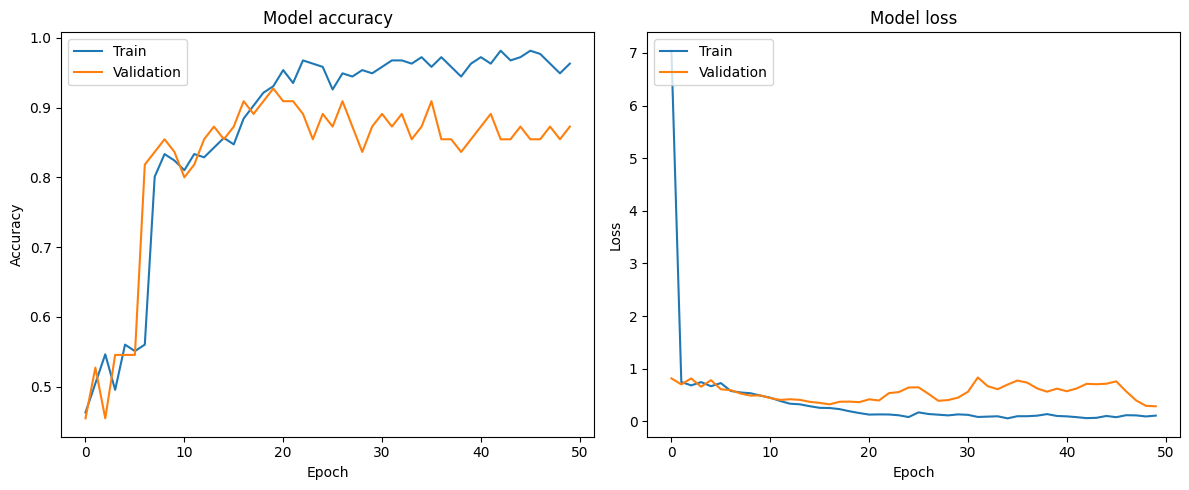

In [199]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [200]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7989 - loss: 0.7864
Accuracy: 0.8088235259056091


In [49]:
{'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}

{'num_layers': 2,
 'units': 32,
 'dropout': 0.0,
 'optimizer': 'rmsprop',
 'lr': 0.01,
 'batch_size': 16,
 'epochs': 10}

# Testing

Saving 772988e1-5181-45c0-8adb-86154f305636.jpeg to 772988e1-5181-45c0-8adb-86154f305636 (1).jpeg


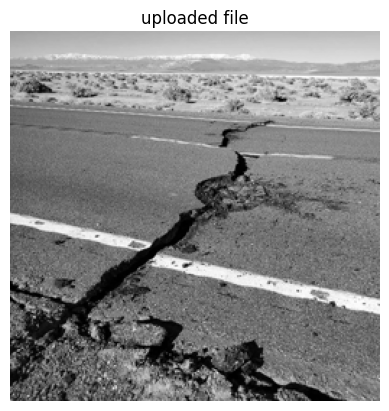

In [226]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image
from skimage.color import rgb2gray
from skimage import util
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

#cv rgb ke bgr
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# preprocess
im_frame = Image.fromarray(img_rgb).resize((64*4, 64*4))
image = (255 * rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)
plt.imshow(imaged, cmap='gray')
plt.title('uploaded file')
plt.axis('off')
plt.show()

In [231]:
# Extract GLCM features as DataFrame
sample_df = glcm_process(filename, path='/content/')

# Scale using SAME scaler used in training
sample_scaled = scaler.transform(sample_df)

# Predict
pred = model.predict(sample_scaled)

print("Prediksi crack:", pred[0][0])
print("retak" if pred[0][0] >= 0.5 else "tidak retak")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediksi crack: 1.0
retak


# Random Search

# Compile Model & Save to JobLib

In [228]:
import joblib
# model
joblib.dump(model,"glcm_v2.pkl")
# scaler
joblib.dump(scaler, "glcm_scaler.pkl")


['glcm_scaler.pkl']

In [229]:
modeljoblib = joblib.load('glcm_v2.pkl')
scalerjoblib = joblib.load('glcm_scaler.pkl')
# Use the loaded model to make predictions
print("After save:",modeljoblib.predict(X_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
After save: [[2.8705627e-01]
 [9.4208047e-03]
 [9.9993742e-01]
 [2.9331937e-01]
 [4.1989069e-03]
 [2.3863263e-01]
 [7.8047550e-01]
 [9.5143485e-01]
 [9.7988468e-01]
 [9.9120831e-01]
 [9.8596412e-01]
 [8.8039845e-01]
 [9.4937272e-02]
 [6.3702458e-01]
 [2.4737798e-02]
 [5.4981537e-02]
 [9.8332101e-01]
 [7.0721006e-01]
 [9.9509215e-01]
 [9.3826210e-01]
 [5.5003244e-02]
 [1.0000000e+00]
 [3.2225803e-01]
 [6.6698533e-01]
 [9.5428205e-01]
 [4.5302603e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [6.6069543e-02]
 [1.4646244e-01]
 [2.2818109e-01]
 [1.0000000e+00]
 [4.3503279e-03]
 [2.2456983e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.3956678e-03]
 [3.8085248e-06]
 [5.7797748e-01]
 [9.9988782e-01]
 [1.6703457e-04]
 [5.2267522e-01]
 [7.2317189e-01]
 [2.9693838e-04]
 [1.0000000e+00]
 [9.9704009e-01]
 [2.7423254e-01]
 [3.4846913e-02]
 [2.2696002e-01]
 [8.1633162e-01]
 [3.1252146e-01]
 [1.0000000e+00]
 [3.1830503e-05]
 [8.0646557e-01]
 [7.2251499e-01]
 [5.6055003e-0

In [232]:
import numpy as np

Vsample_scaled = scalerjoblib.transform(sample_df)
Vpred = modeljoblib.predict(Vsample_scaled)
print("Prediksi crack:", pred[0][0])

if Vpred[0][0] < 0.5:
  print("tidak retak")
else:
  print("retak nih 😂")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediksi crack: 1.0
retak nih 😂
